Imports

In [1124]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

Codigo de los metodos utilizados

In [1125]:
def euler_explicito(funcion, intervalo, paso):
    num_puntos = int(intervalo / paso) + 1
    resultados_u = np.zeros(num_puntos, dtype=float)
    resultados_v = np.zeros(num_puntos, dtype=float)
    resultados_u[0] = 0
    resultados_v[0] = 0

    for n in range(num_puntos - 1):
        u_actual = resultados_u[n] + paso * resultados_v[n]
        resultados_u[n+1] = u_actual
        v_actual = resultados_v[n] + paso * funcion(resultados_u[n])
        resultados_v[n+1] = v_actual

    return resultados_u

def euler_implicito(inversa_matriz_a, termino_independiente, intervalo, paso):
    num_puntos = int(intervalo / paso) + 1
    resultados = np.zeros((2, num_puntos))

    for n in range(num_puntos - 1):
        valores_auxiliares = inversa_matriz_a @ resultados[:, n] + termino_independiente
        resultados[:, n+1] = valores_auxiliares

    return resultados[1]

def runge_kutta_orden2(f, intervalo, paso):
    num_puntos = int(intervalo / paso) + 1
    resultados_u = np.zeros(num_puntos, dtype=float)
    resultados_v = np.zeros(num_puntos, dtype=float)
    resultados_u[0] = 0
    resultados_v[0] = 0

    for n in range(num_puntos - 1):
        u_prediccion = resultados_u[n] + paso * resultados_v[n]
        v_prediccion = resultados_v[n] + paso * f(resultados_u[n])

        resultados_u[n+1] = resultados_u[n] + (paso/2) * (resultados_v[n] + v_prediccion)
        resultados_v[n+1] = resultados_v[n] + (paso/2) * (f(resultados_u[n]) + f(u_prediccion))

    return resultados_u

In [1126]:
def error_euler(aproximacion,intervalo,h, analitica):
    paso = 0
    error = aproximacion[:]
    for i in range(len(aproximacion)):
        error[i] = analitica(paso) - aproximacion[i]
        paso+=h
    return error


def error_rugen_kutta(aproximacion, intervalo, h, analitica):
    paso = 0
    error = aproximacion[:]
    for i in range(len(aproximacion)):
        error[i] = analitica(paso) - aproximacion[i]
        paso += h
    return error

Constantes dadas para resolver el problema

In [1127]:
padronJI = 106957
padronTB = 102665
padronCZ = 106260
padron = np.sum([padronJI,padronTB,padronCZ])
m = padronJI/200  # masa (kg)
k = 25000  # constante elástica del muelle (N/m)
lambda_ = 0  # constante de amortiguación (Ns/m)
c = 0.1  # cota del terreno (m)
c_prim = 0

In [1128]:
def analitica(t):
    return c - c * np.cos(((k/m)**0.5)*t)

def funcion_sin_amortiguacion(x):
    return (k/m)*(c-x)

def generar_matriz_invertida(paso, lambda_, m, k):
    divisor = (paso**2)*k+paso*lambda_+m

    A_invertida = np.array([
        [m/divisor , -paso*k/divisor],
        [paso*m/divisor , (paso*lambda_+m)/divisor]
    ])

    termino_indep = np.array([ paso*((k*c/m)+(lambda_*c_prim/m)), 0])
    return A_invertida, termino_indep

Ejecuciones con h = 0.005

Metodo de Euler explicito sin amortiguar

In [1129]:
rango = 5
paso = 0.005
aprox_euler_explicito = euler_explicito(funcion_sin_amortiguacion,rango,paso)
tiempo_discretizado = np.arange(0,rango+paso,paso)

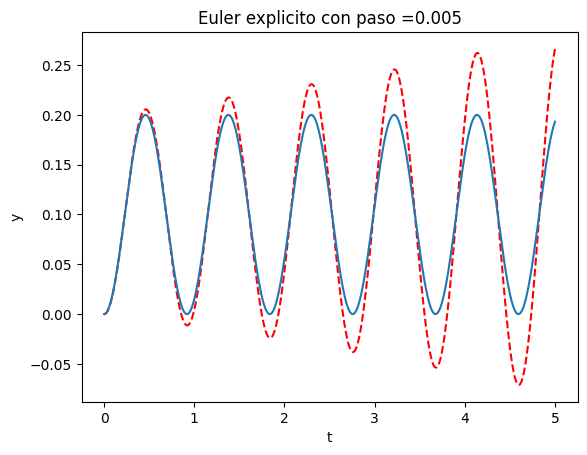

Text(0.5, 1.0, 'error euler implicito con paso = 0.005')

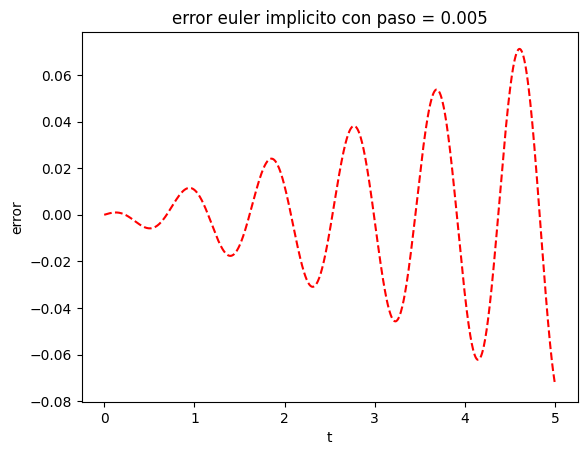

In [1130]:
plt.plot(tiempo_discretizado,aprox_euler_explicito, 'r--')
plt.xlabel('t')
plt.ylabel('y')
plt.title("Euler explicito con paso =" + str(paso))
plt.plot(tiempo_discretizado,analitica(tiempo_discretizado))
plt.show()

error = error_euler(aprox_euler_explicito, rango, paso, analitica)
plt.plot(tiempo_discretizado,error, "r--")
plt.xlabel('t')
plt.ylabel('error')
plt.title("error euler implicito con paso = " + str(paso))

Metodo de Euler implicito sin amortiguar

In [1131]:
rango = 5
paso = 0.005
a, ind =  generar_matriz_invertida(paso, 0, m, k)
aprox_euler_implicito = euler_implicito(a,ind,rango,paso)
tiempo_discretizado = np.arange(0,rango+paso,paso)

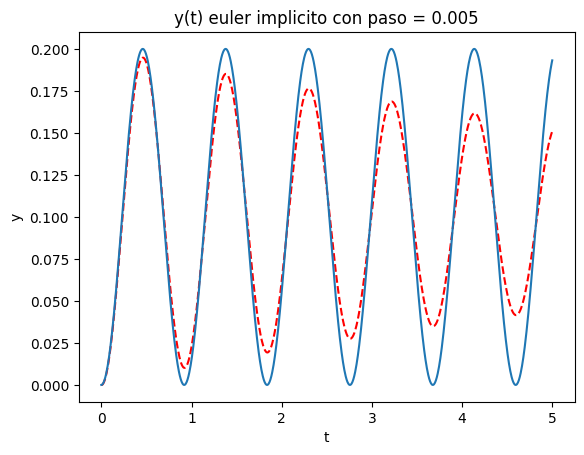

Text(0.5, 1.0, 'error euler implicito con paso = 0.005')

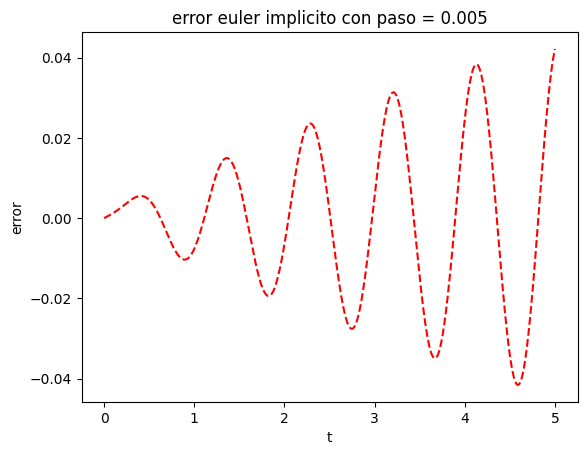

In [1132]:
plt.plot(tiempo_discretizado,aprox_euler_implicito, 'r--')
plt.xlabel('t')
plt.ylabel('y')
plt.title("y(t) euler implicito con paso = " + str(paso))
plt.plot(tiempo_discretizado,analitica(tiempo_discretizado))
plt.show()

error = error_euler(aprox_euler_implicito, rango, paso, analitica)
plt.plot(tiempo_discretizado,error, "r--")
plt.xlabel('t')
plt.ylabel('error')
plt.title("error euler implicito con paso = " + str(paso))

Ruggen Kutta de orden 2

In [1133]:
rango = 5
paso = 0.005
runge_kutta = runge_kutta_orden2(funcion_sin_amortiguacion, rango, paso)
tiempo_discretizado = np.arange(0,rango+paso,paso)

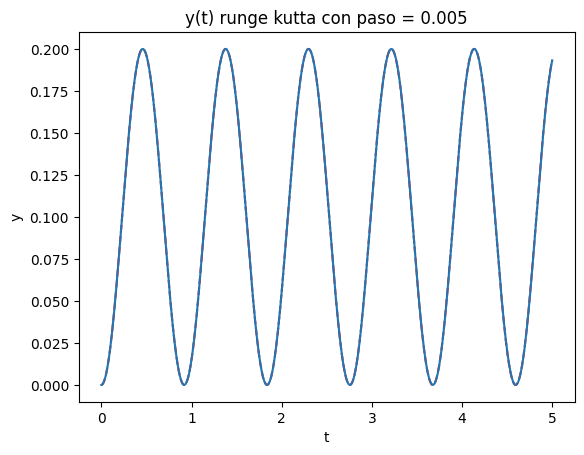

Text(0.5, 1.0, 'Error con el metodo de runge kutta de orden 2')

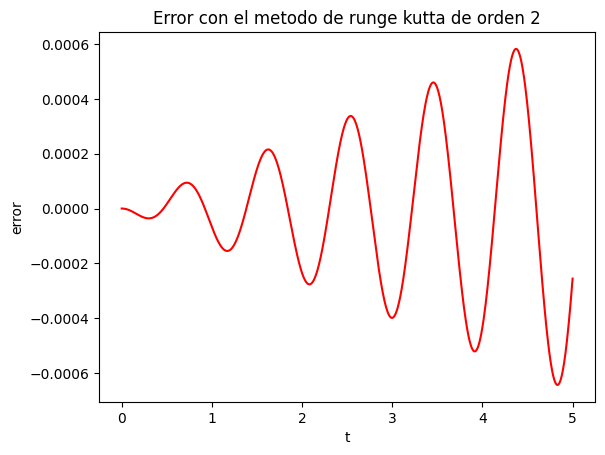

In [1134]:
plt.plot(tiempo_discretizado,runge_kutta, 'r--')
plt.title("y(t) runge kutta con paso = " + str(paso))
plt.plot(tiempo_discretizado,analitica(tiempo_discretizado))
plt.xlabel('t')
plt.ylabel('y')
plt.show()

error = error_rugen_kutta(runge_kutta, rango, paso, analitica)
plt.plot(tiempo_discretizado,error, "red")
plt.xlabel('t')
plt.ylabel('error')
plt.title("Error con el metodo de runge kutta de orden 2")

Se calcula el orden del metodo usando el paso más estable de las 3 ejecuciones realizadass

In [1135]:
error_explicito = error_euler(aprox_euler_explicito, rango, paso, analitica)
error_implicito = error_euler(aprox_euler_implicito, rango, paso, analitica)
error_kutta = error_rugen_kutta(runge_kutta, rango, paso, analitica)

# Error Euler explicito

delta_e_1 = error_explicito[-1] - error_explicito[-2]
delta_e_2 = error_explicito[-2] - error_explicito[-3]
delta_e_3 = error_explicito[-3] - error_explicito[-4]

p = np.log(delta_e_1/delta_e_2)/np.log(delta_e_2/delta_e_3)
print("El orden de convergencia de Euler explicito es: " + str(p))

# Error Euler implicito

delta_i_1 = error_implicito[-1] - error_implicito[-2]
delta_i_2 = error_implicito[-2] - error_implicito[-3]
delta_i_3 = error_implicito[-3] - error_implicito[-4]

p = np.log(delta_i_1/delta_i_2)/np.log(delta_i_2/delta_i_3)
print("El orden de convergencia de Euler implicito es: " + str(p))

# Error Runge Kutta

delta_k_1 = error_kutta[-1] - error_kutta[-2]
delta_k_2 = error_kutta[-2] - error_kutta[-3]
delta_k_3 = error_kutta[-3] - error_kutta[-4]

p = np.log(delta_k_1/delta_k_2)/np.log(delta_k_2/delta_k_3)
print("El orden de convergencia de Euler runge kutta es: " + str(p))

El orden de convergencia de Euler explicito es: 1.091634176201194
El orden de convergencia de Euler implicito es: 1.0900572934323425
El orden de convergencia de Euler runge kutta es: 1.0970729275266298


Aprovechando que este h es el mas estable de las 3 ejecuciciones para estimar el w solicitado en el punto 1.2

Obtengo los indices de donde se encuentran los maximos de la función

In [1136]:
maximos_implicito, _ = find_peaks(aprox_euler_implicito)
maximos_explicito, _ = find_peaks(aprox_euler_explicito)
maximos_runge_kutta, _ = find_peaks(runge_kutta) 

diferencias_explicito = np.diff(tiempo_discretizado[maximos_explicito])
diferencias_implicito = np.diff(tiempo_discretizado[maximos_implicito])
diferencias_runge_kutta = np.diff(tiempo_discretizado[maximos_runge_kutta])

promedio_explicito = np.mean(diferencias_explicito)
promedio_implicito = np.mean(diferencias_implicito)
promedio_runge_kutta = np.mean(diferencias_runge_kutta)

frecuencia_exp_explicito = 2*np.pi/promedio_explicito
frecuencia_exp_implicito = 2*np.pi/promedio_implicito
frecuencia_exp_runge_kutta = 2*np.pi/promedio_runge_kutta

print("La frecuencia de euler explicito es: " + str(frecuencia_exp_explicito))
print("La frecuencia de euler implicito es: " + str(frecuencia_exp_implicito))
print("La frecuencia de runge kutta es: " + str(frecuencia_exp_runge_kutta))
print("La frecuencia analitica es: " + str((k/m)**0.5))

La frecuencia de euler explicito es: 6.8295492469343335
La frecuencia de euler implicito es: 6.8295492469343335
La frecuencia de runge kutta es: 6.838841150671659
La frecuencia analitica es: 6.837233244886601


Ejecuciones para h = 0.01

Metodo de Euler explicito sin amortiguar

In [1137]:
rango = 5
paso = 0.01
aprox_euler_explicito = euler_explicito(funcion_sin_amortiguacion,rango,paso)
tiempo_discretizado = np.arange(0,rango+paso,paso)

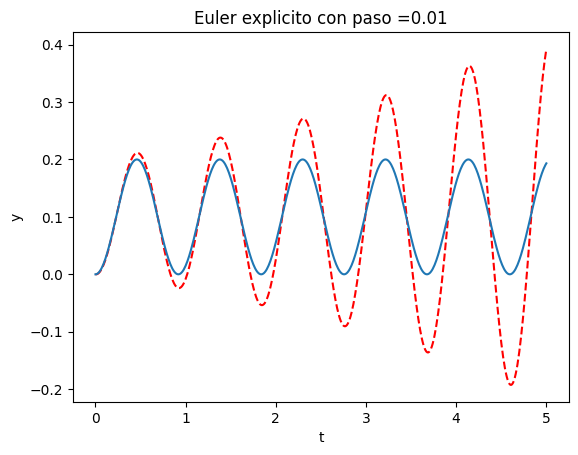

Text(0.5, 1.0, 'error euler implicito con paso = 0.01')

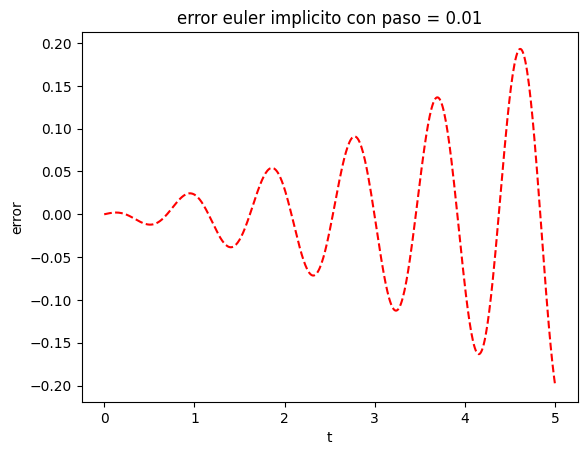

In [1138]:
plt.plot(tiempo_discretizado,aprox_euler_explicito, 'r--')
plt.xlabel('t')
plt.ylabel('y')
plt.title("Euler explicito con paso =" + str(paso))
plt.plot(tiempo_discretizado,analitica(tiempo_discretizado))
plt.show()

error = error_euler(aprox_euler_explicito, rango, paso, analitica)
plt.plot(tiempo_discretizado,error, "r--")
plt.xlabel('t')
plt.ylabel('error')
plt.title("error euler implicito con paso = " + str(paso))

Metodo de Euler implicito sin amortiguar

In [1139]:
rango = 5
paso = 0.01
a, ind =  generar_matriz_invertida(paso, 0, m, k)
aprox_euler_implicito = euler_implicito(a,ind,rango,paso)
tiempo_discretizado = np.arange(0,rango+paso,paso)

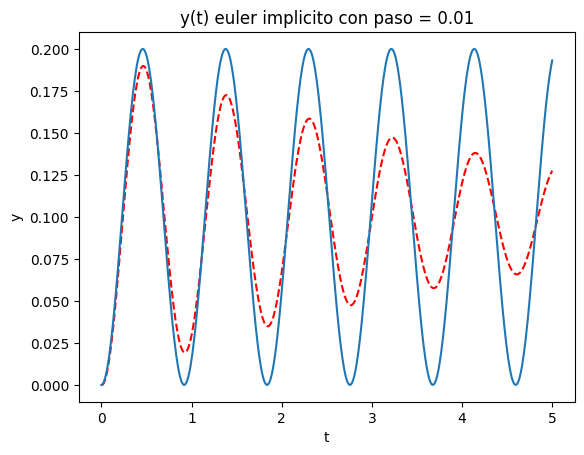

Text(0.5, 1.0, 'error euler implicito con paso = 0.01')

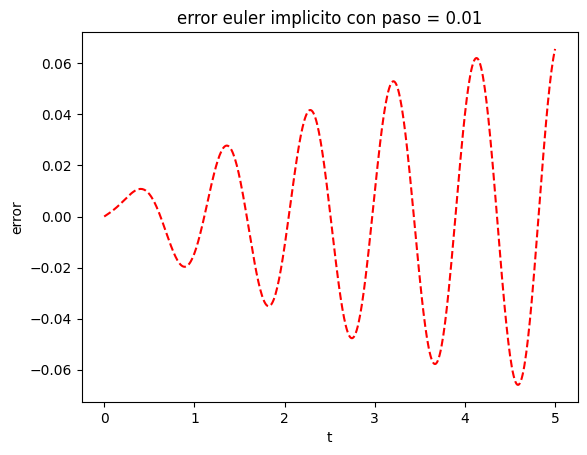

In [1140]:
plt.plot(tiempo_discretizado,aprox_euler_implicito, 'r--')
plt.xlabel('t')
plt.ylabel('y')
plt.title("y(t) euler implicito con paso = " + str(paso))
plt.plot(tiempo_discretizado,analitica(tiempo_discretizado))
plt.show()

error = error_euler(aprox_euler_implicito, rango, paso, analitica)
plt.plot(tiempo_discretizado,error, "r--")
plt.xlabel('t')
plt.ylabel('error')
plt.title("error euler implicito con paso = " + str(paso))

Ruggen Kutta de orden 2

In [1141]:
rango = 5
paso = 0.01
runge_kutta = runge_kutta_orden2(funcion_sin_amortiguacion, rango, paso)
tiempo_discretizado = np.arange(0,rango+paso,paso)

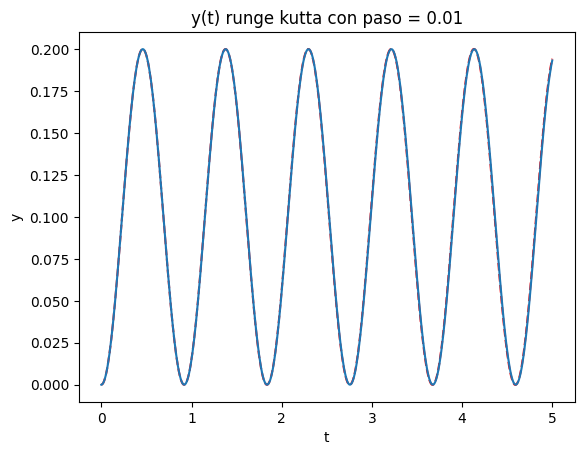

Text(0.5, 1.0, 'Error con el metodo de runge kutta de orden 2')

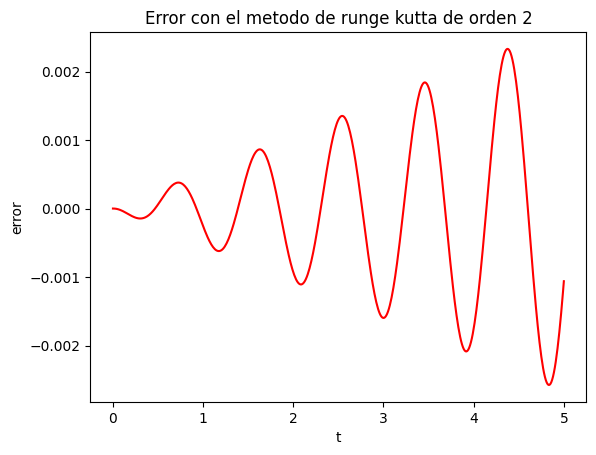

In [1142]:
plt.plot(tiempo_discretizado,runge_kutta, 'r--')
plt.title("y(t) runge kutta con paso = " + str(paso))
plt.plot(tiempo_discretizado,analitica(tiempo_discretizado))
plt.xlabel('t')
plt.ylabel('y')
plt.show()

error = error_rugen_kutta(runge_kutta, rango, paso, analitica)
plt.plot(tiempo_discretizado,error, "red")
plt.xlabel('t')
plt.ylabel('error')
plt.title("Error con el metodo de runge kutta de orden 2")

In [1143]:
error_explicito = error_euler(aprox_euler_explicito, rango, paso, analitica)
error_implicito = error_euler(aprox_euler_implicito, rango, paso, analitica)
error_kutta = error_rugen_kutta(runge_kutta, rango, paso, analitica)

# Error Euler explicito

delta_e_1 = error_explicito[-1] - error_explicito[-2]
delta_e_2 = error_explicito[-2] - error_explicito[-3]
delta_e_3 = error_explicito[-3] - error_explicito[-4]

p = np.log(delta_e_1/delta_e_2)/np.log(delta_e_2/delta_e_3)
print("El orden de convergencia de Euler explicito es: " + str(p))

# Error Euler implicito

delta_i_1 = error_implicito[-1] - error_implicito[-2]
delta_i_2 = error_implicito[-2] - error_implicito[-3]
delta_i_3 = error_implicito[-3] - error_implicito[-4]

p = np.log(delta_i_1/delta_i_2)/np.log(delta_i_2/delta_i_3)
print("El orden de convergencia de Euler implicito es: " + str(p))

# Error Runge Kutta

delta_k_1 = error_kutta[-1] - error_kutta[-2]
delta_k_2 = error_kutta[-2] - error_kutta[-3]
delta_k_3 = error_kutta[-3] - error_kutta[-4]

p = np.log(delta_k_1/delta_k_2)/np.log(delta_k_2/delta_k_3)
print("El orden de convergencia de Euler runge kutta es: " + str(p))

El orden de convergencia de Euler explicito es: 1.1680560835595786
El orden de convergencia de Euler implicito es: 1.1604677321586097
El orden de convergencia de Euler runge kutta es: 1.192848182768349


In [1144]:
maximos_implicito, _ = find_peaks(aprox_euler_implicito)
maximos_explicito, _ = find_peaks(aprox_euler_explicito)
maximos_runge_kutta, _ = find_peaks(runge_kutta) 

diferencias_explicito = np.diff(tiempo_discretizado[maximos_explicito])
diferencias_implicito = np.diff(tiempo_discretizado[maximos_implicito])
diferencias_runge_kutta = np.diff(tiempo_discretizado[maximos_runge_kutta])

promedio_explicito = np.mean(diferencias_explicito)
promedio_implicito = np.mean(diferencias_implicito)
promedio_runge_kutta = np.mean(diferencias_runge_kutta)

frecuencia_exp_explicito = 2*np.pi/promedio_explicito
frecuencia_exp_implicito = 2*np.pi/promedio_implicito
frecuencia_exp_runge_kutta = 2*np.pi/promedio_runge_kutta

print("La frecuencia de euler explicito es: " + str(frecuencia_exp_explicito))
print("La frecuencia de euler implicito es: " + str(frecuencia_exp_implicito))
print("La frecuencia de runge kutta es: " + str(frecuencia_exp_runge_kutta))
print("La frecuencia analitica es: " + str((k/m)**0.5))

La frecuencia de euler explicito es: 6.829549246934333
La frecuencia de euler implicito es: 6.829549246934333
La frecuencia de runge kutta es: 6.848158372947778
La frecuencia analitica es: 6.837233244886601


Graficas con h = 0.00001

Metodo de Euler explicito sin amortiguar

In [1145]:
rango = 5
paso = 0.00001
aprox_euler_explicito = euler_explicito(funcion_sin_amortiguacion,rango,paso)
tiempo_discretizado = np.arange(0,rango+paso,paso)[0:500000]

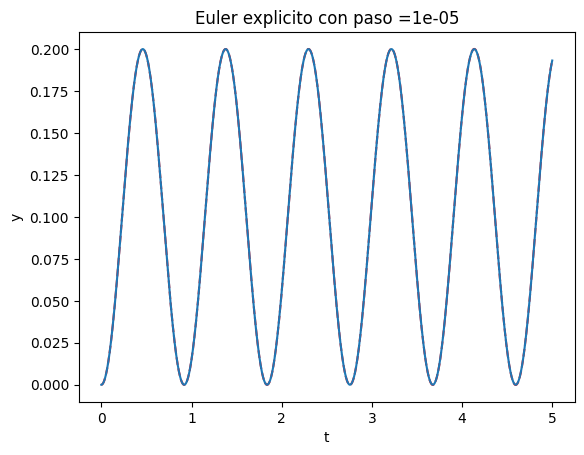

Text(0.5, 1.0, 'error euler implicito con paso = 1e-05')

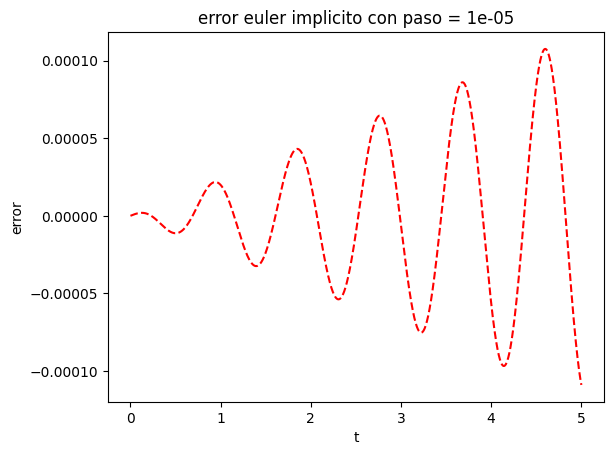

In [1146]:
plt.plot(tiempo_discretizado,aprox_euler_explicito, 'r--')
plt.xlabel('t')
plt.ylabel('y')
plt.title("Euler explicito con paso =" + str(paso))
plt.plot(tiempo_discretizado,analitica(tiempo_discretizado))
plt.show()

error = error_euler(aprox_euler_explicito, rango, paso, analitica)
plt.plot(tiempo_discretizado,error, "r--")
plt.xlabel('t')
plt.ylabel('error')
plt.title("error euler implicito con paso = " + str(paso))

Metodo de Euler implicito sin amortiguar

In [1147]:
rango = 5
paso = 0.00001
a, ind =  generar_matriz_invertida(paso, 0, m, k)
aprox_euler_implicito = euler_implicito(a,ind,rango,paso)
tiempo_discretizado = np.arange(0,rango+paso,paso)[0:500000]

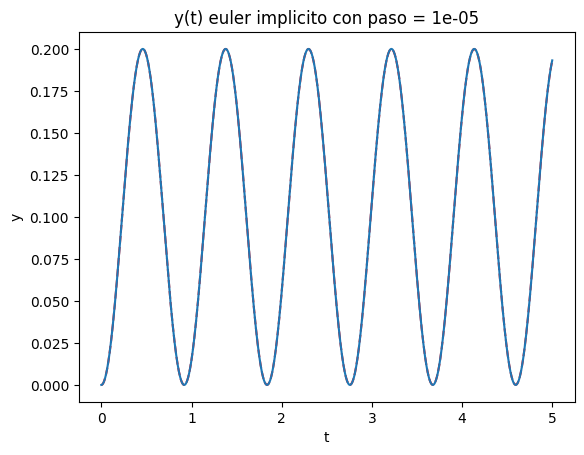

Text(0.5, 1.0, 'error euler implicito con paso = 1e-05')

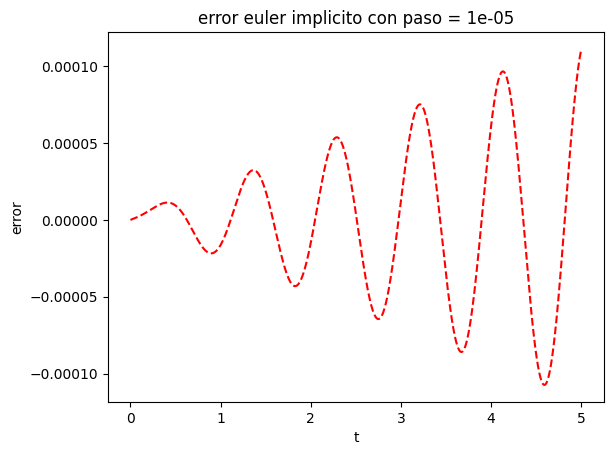

In [1148]:
plt.plot(tiempo_discretizado,aprox_euler_implicito, 'r--')
plt.xlabel('t')
plt.ylabel('y')
plt.title("y(t) euler implicito con paso = " + str(paso))
plt.plot(tiempo_discretizado,analitica(tiempo_discretizado))
plt.show()

error = error_euler(aprox_euler_implicito, rango, paso, analitica)
plt.plot(tiempo_discretizado,error, "r--")
plt.xlabel('t')
plt.ylabel('error')
plt.title("error euler implicito con paso = " + str(paso))

Ruggen Kutta de orden 2

In [1149]:
rango = 5
paso = 0.00001
runge_kutta = runge_kutta_orden2(funcion_sin_amortiguacion, rango, paso)
tiempo_discretizado = np.arange(0,rango+paso,paso)[0:500000]

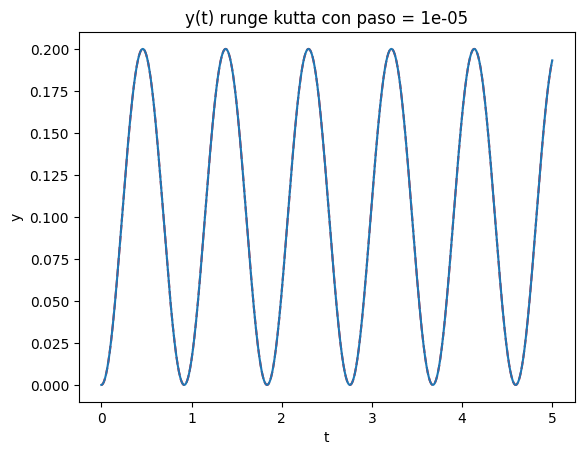

Text(0.5, 1.0, 'Error con el metodo de runge kutta de orden 2')

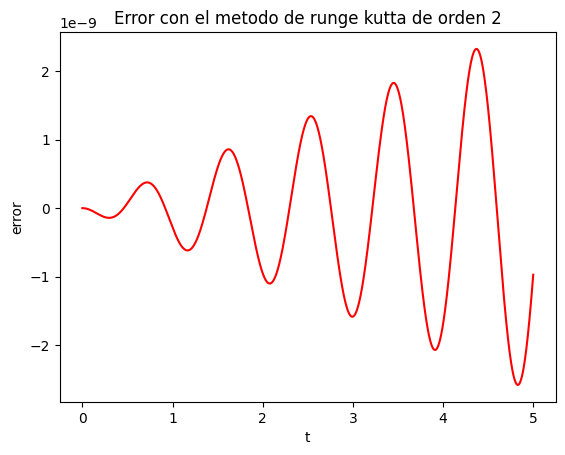

In [1150]:
plt.plot(tiempo_discretizado,runge_kutta, 'r--')
plt.title("y(t) runge kutta con paso = " + str(paso))
plt.plot(tiempo_discretizado,analitica(tiempo_discretizado))
plt.xlabel('t')
plt.ylabel('y')
plt.show()

error = error_rugen_kutta(runge_kutta, rango, paso, analitica)
plt.plot(tiempo_discretizado,error, "red")
plt.xlabel('t')
plt.ylabel('error')
plt.title("Error con el metodo de runge kutta de orden 2")

In [1151]:
error_explicito = error_euler(aprox_euler_explicito, rango, paso, analitica)
error_implicito = error_euler(aprox_euler_implicito, rango, paso, analitica)
error_kutta = error_rugen_kutta(runge_kutta, rango, paso, analitica)

# Error Euler explicito

delta_e_1 = error_explicito[-1] - error_explicito[-2]
delta_e_2 = error_explicito[-2] - error_explicito[-3]
delta_e_3 = error_explicito[-3] - error_explicito[-4]

p = np.log(delta_e_1/delta_e_2)/np.log(delta_e_2/delta_e_3)
print("El orden de convergencia de Euler explicito es: " + str(p))

# Error Euler implicito

delta_i_1 = error_implicito[-1] - error_implicito[-2]
delta_i_2 = error_implicito[-2] - error_implicito[-3]
delta_i_3 = error_implicito[-3] - error_implicito[-4]

p = np.log(delta_i_1/delta_i_2)/np.log(delta_i_2/delta_i_3)
print("El orden de convergencia de Euler implicito es: " + str(p))

# Error Runge Kutta

delta_k_1 = error_kutta[-1] - error_kutta[-2]
delta_k_2 = error_kutta[-2] - error_kutta[-3]
delta_k_3 = error_kutta[-3] - error_kutta[-4]

p = np.log(delta_k_1/delta_k_2)/np.log(delta_k_2/delta_k_3)
print("El orden de convergencia de Euler runge kutta es: " + str(p))

El orden de convergencia de Euler explicito es: 1.0002020908892197
El orden de convergencia de Euler implicito es: 1.0002020933143392
El orden de convergencia de Euler runge kutta es: 1.0002022051454642


In [1152]:
maximos_implicito, _ = find_peaks(aprox_euler_implicito)
maximos_explicito, _ = find_peaks(aprox_euler_explicito)
maximos_runge_kutta, _ = find_peaks(runge_kutta) 

diferencias_explicito = np.diff(tiempo_discretizado[maximos_explicito])
diferencias_implicito = np.diff(tiempo_discretizado[maximos_implicito])
diferencias_runge_kutta = np.diff(tiempo_discretizado[maximos_runge_kutta])

promedio_explicito = np.mean(diferencias_explicito)
promedio_implicito = np.mean(diferencias_implicito)
promedio_runge_kutta = np.mean(diferencias_runge_kutta)

frecuencia_exp_explicito = 2*np.pi/promedio_explicito
frecuencia_exp_implicito = 2*np.pi/promedio_implicito
frecuencia_exp_runge_kutta = 2*np.pi/promedio_runge_kutta

print("La frecuencia de euler explicito es: " + str(frecuencia_exp_explicito))
print("La frecuencia de euler implicito es: " + str(frecuencia_exp_implicito))
print("La frecuencia de runge kutta es: " + str(frecuencia_exp_runge_kutta))
print("La frecuencia analitica es: " + str((k/m)**0.5))

La frecuencia de euler explicito es: 6.837241143220455
La frecuencia de euler implicito es: 6.837241143220455
La frecuencia de runge kutta es: 6.8372225428859945
La frecuencia analitica es: 6.837233244886601


Nuevas constanstes 

In [1153]:
def obtener_pos(t):
    if 0 <= t < 1:
        return 0
    elif 1 <= t < 1.1:
        return t - 1
    elif 1.1 <= t < 1.3:
        return 0.1
    elif 1.3 <= t < 1.4:
        return -t + 1.4
    else:
        return 0

def obtener_velocidad(t):
    if 0 <= t < 1:
        return 0
    elif 1 <= t < 1.1:
        return 1
    elif 1.1 <= t < 1.3:
        return 0
    elif 1.3 <= t < 1.4:
        return -1
    else:
        return 0 
    
def ecu_diff(func_y, func_pos, tiempo, y_dev, func_vel, lambbda, k_const, masa):
    res = (k_const / masa) * (func_pos(tiempo) - func_y) + ((lambbda / masa) * (func_vel(tiempo) - y_dev))
    return res

In [1154]:
def runge_kutta_orden_2_con_mas_valores(intervalo, paso, lambda_, k_const, func_y, func_pos, func_vel, masa):
    cantidad_puntos = int(intervalo / paso) + 1
    valores_y = np.zeros(cantidad_puntos, dtype=float)
    valores_y_dev = np.zeros(cantidad_puntos, dtype=float)
    valores_y[0] = 0
    valores_y_dev[0] = 0
    tiempo_actual = 0

    for n in range(cantidad_puntos - 1):
        y_predictor = valores_y[n] + paso * valores_y_dev[n]
        y_dev_predictor = valores_y_dev[n] + paso * func_y(valores_y[n], func_pos, tiempo_actual, valores_y_dev[n], func_vel, lambda_, k_const, masa)
        
        valores_y[n+1] = valores_y[n] + (paso/2) * (valores_y_dev[n] + y_dev_predictor)
        valores_y_dev[n+1] = valores_y_dev[n] + (paso/2) * (
            func_y(valores_y[n], func_pos, tiempo_actual, valores_y_dev[n], func_vel, lambda_, k_const, masa) +
            func_y(y_predictor, func_pos, tiempo_actual + paso, y_dev_predictor, func_vel, lambda_, k_const, masa)
        )

        tiempo_actual += paso

    return valores_y, valores_y_dev

In [1155]:
# Constantes 
rango = 5
paso = 0.005
lambd = 750
k_const = 25000
masa = np.sum([padronJI,padronTB,padronCZ])/200

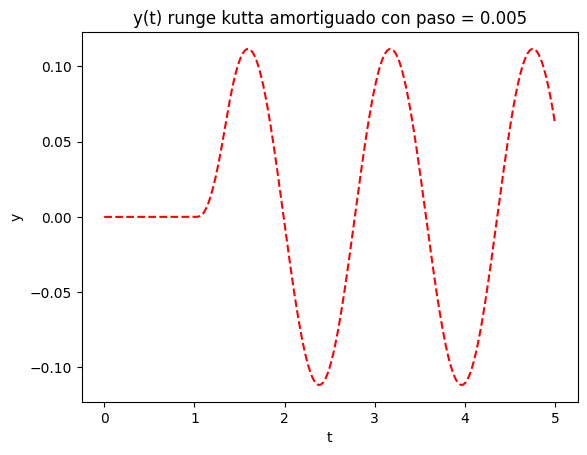

In [1156]:
tiempo_discretizado = np.arange(0,rango+paso,paso)
aprox_con_amortiguamiento = runge_kutta_orden_2_con_mas_valores(rango, paso, lambda_, k_const, ecu_diff, obtener_pos, obtener_velocidad, masa)
plt.plot(tiempo_discretizado, aprox_con_amortiguamiento[0],  'r--')
plt.title("y(t) runge kutta amortiguado con paso = " + str(paso))
plt.xlabel('t')
plt.ylabel('y')
plt.show()